Suppose there is a blob committing crimes in our town. We have locations for where the crimes are committed and a model of how the blob behaves: they're unlikely to rob their next-door neighbours, but also going too far away is a lot of effort, so we expect the blob to live about R kilometers away from their crime locations on average. Based on the locations of the crimes, where is our best guess for where our criminal lives?

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

We'll plot the blob's crime locations in red and their house in green.

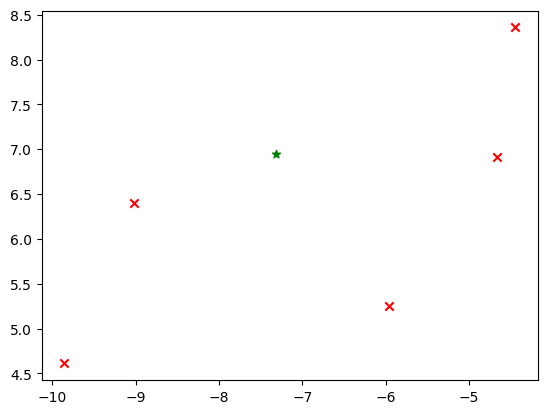

In [2]:
R = 3

def generateSpree(N):
    blobHouse = [r.uniform(-10, 10) for c in range(2)]
    locations = [blobHouse]
    for i in range(N):
        blobLocation = [c for c in blobHouse]
        for j in range(R ** 2):
            blobLocation = [c + r.uniform(-1, 1) for c in blobLocation]
        locations.append(blobLocation)
    return(locations)

def plotSpree(spree):
    plt.scatter(spree[0][0], spree[0][1], color = "Green", marker = "*")
    for blobLocation in spree[1:]:
        plt.scatter(blobLocation[0], blobLocation[1], color = "Red", marker = "x")
    plt.show()

spree = generateSpree(5)
plotSpree(spree)

So in the real world we only know our red crosses but not the green star. How can we find it? Let's try drawing a circle of radius R around each point and see if the intersections tell us anything.

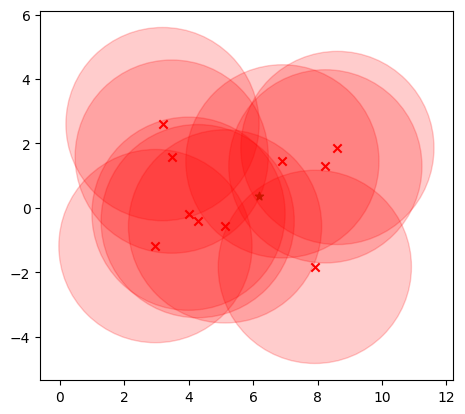

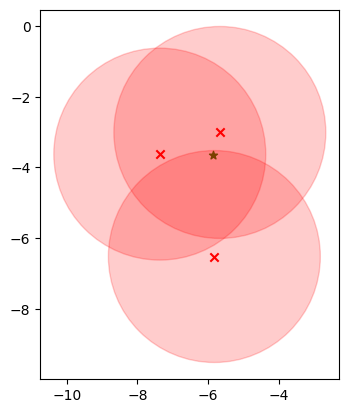

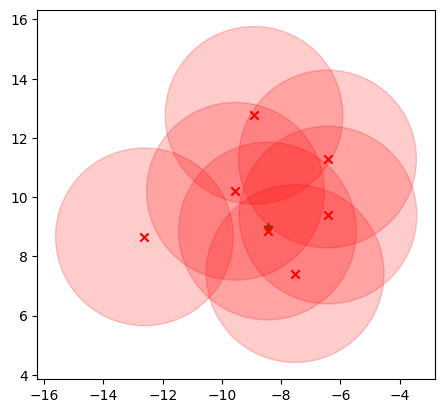

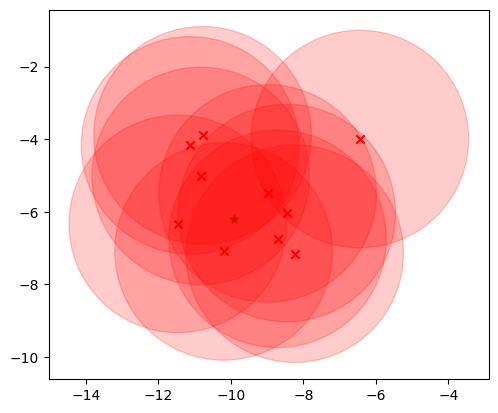

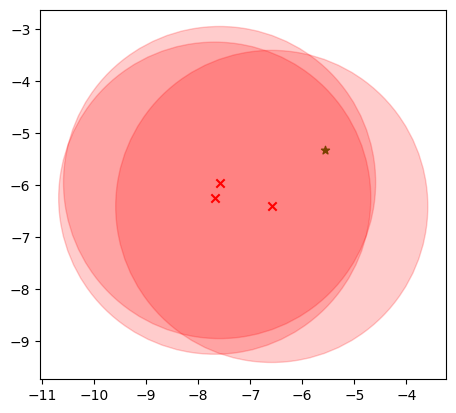

In [3]:
def plotSpree(spree):
    fig, ax = plt.subplots()
    ax.scatter(spree[0][0], spree[0][1], color = "Green", marker = "*", label = "House")
    for blobLocation in spree[1:]:
        ax.scatter(blobLocation[0], blobLocation[1], color = "Red", marker = "x")
        ax.add_patch(plt.Circle((blobLocation[0], blobLocation[1]), R, fill = True, facecolor = "Red", alpha = 0.2, edgecolor = "Red"))
    ax.set_aspect("equal", "box")
    plt.show()

for i in range(5):
    spree = generateSpree(r.randint(2, 10))
    plotSpree(spree)

Often our green star is within the brightest red areas. Let's formalize this process into a search heuristic and plot the results. We'll generate a tunable search aalgorithm that gives us the estimated probability that the criminal blob lives in each square of the heatmap. 

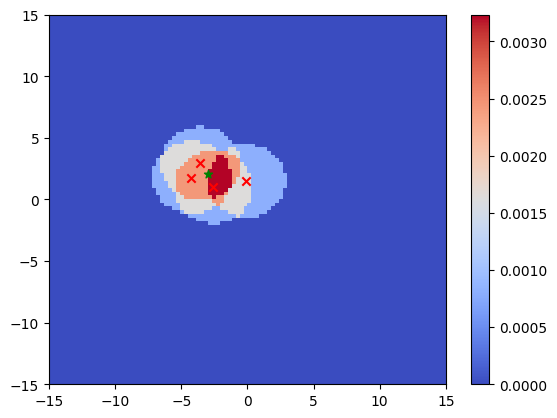

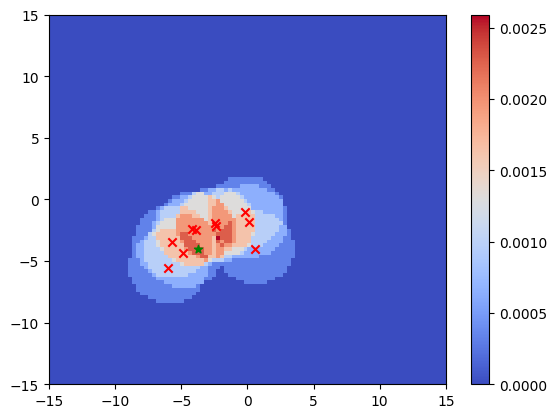

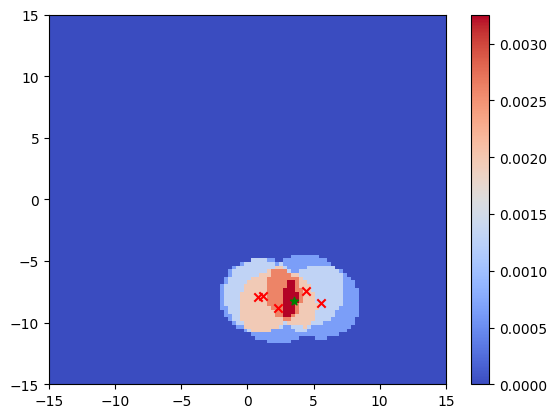

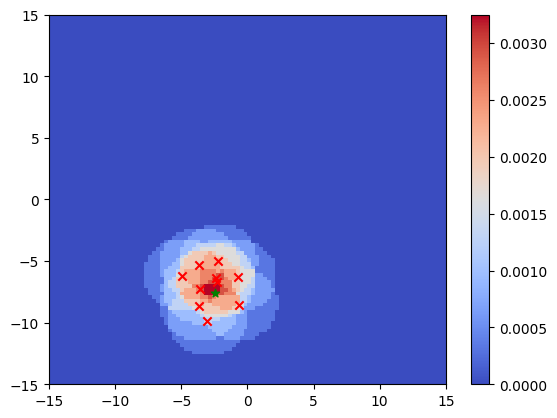

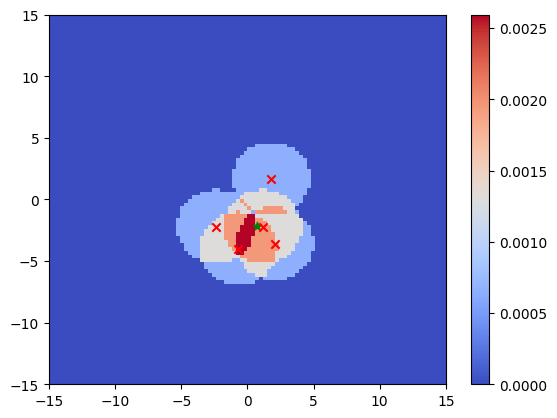

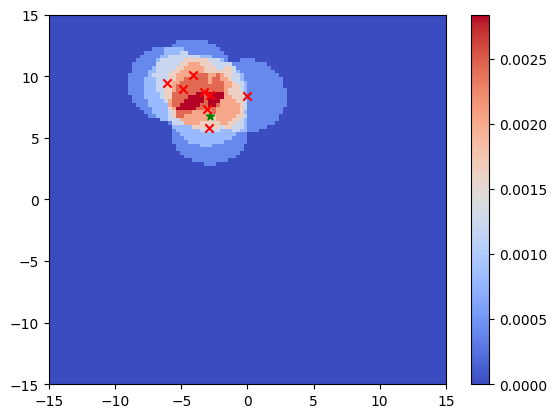

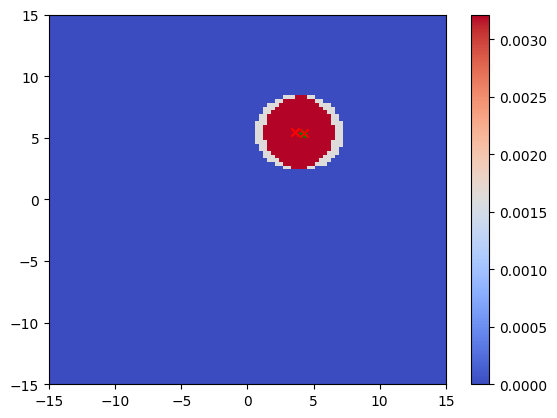

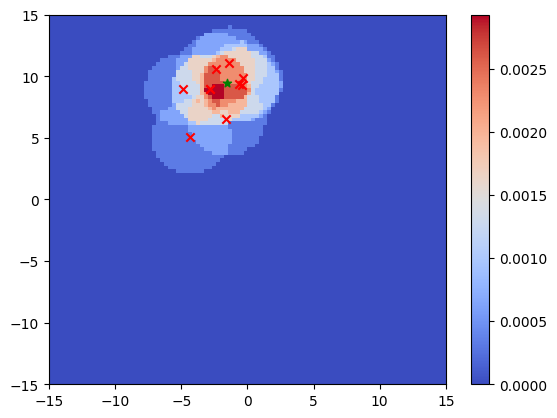

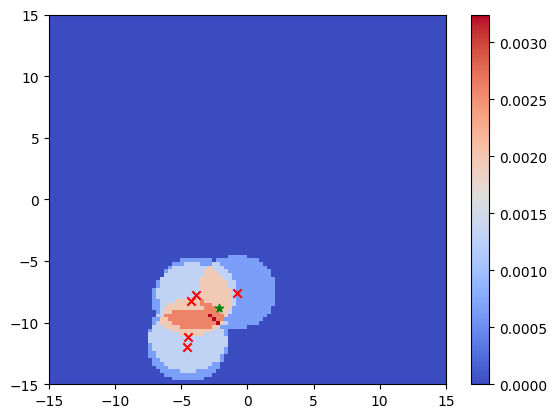

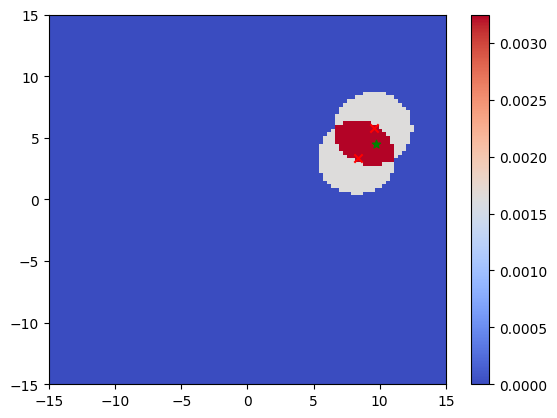

In [4]:
ranges = [[-15, 15], [-15, 15]]

def searchForStar(spree, ranges = ranges, resolution = 100):
    heatmap = [[0 for c in range(resolution)] for c in range(resolution)]
    xs = np.linspace(ranges[0][0], ranges[0][1], resolution)
    ys = np.linspace(ranges[1][0], ranges[1][1], resolution)
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            for location in spree[1:]:
                if (location[0] - x) ** 2 + (location[1] - y) ** 2 < R ** 2:
                    heatmap[yi][xi] += 1  
    total = sum(sum(row) for row in heatmap)
    output = [[c / total for c in row] for row in heatmap]
    return(output)

#Redefining plot spree so we can do plt.show() after
def plotSpreeNoShow(spree):
    plt.scatter(spree[0][0], spree[0][1], color = "Green", marker = "*")
    for blobLocation in spree[1:]:
        plt.scatter(blobLocation[0], blobLocation[1], color = "Red", marker = "x")

for i in range(10):
    spree = generateSpree(r.randint(2, 10))
    heatmap = searchForStar(spree)
    plt.imshow(
        heatmap,
        extent = [ranges[0][0], ranges[0][1], ranges[1][0], ranges[1][1]],
        origin = "lower",
        aspect = "auto",
        cmap = "coolwarm"
    )
    plt.colorbar()
    plotSpreeNoShow(spree)
    plt.show()

So we're finding the green star quite often when we know R, but what if R varies for different blob criminals. Let's have R vary slightly and use the standard deviation of the distances to approximate it!

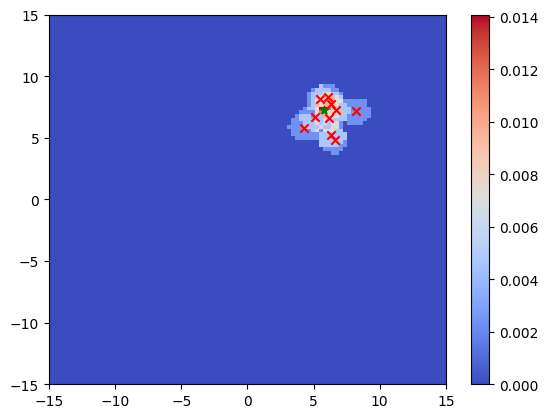

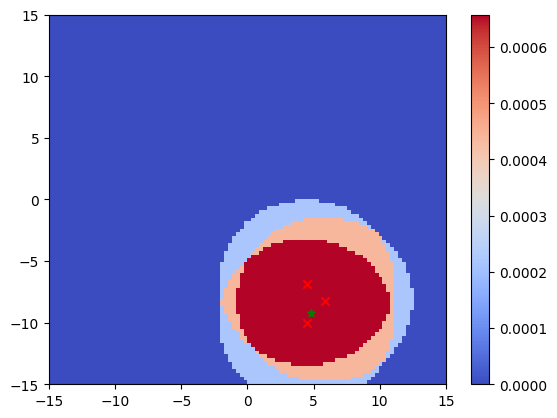

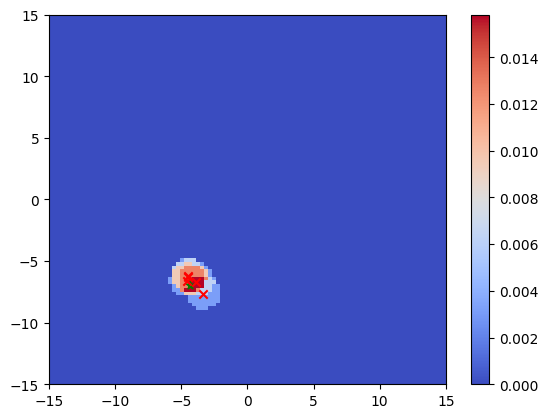

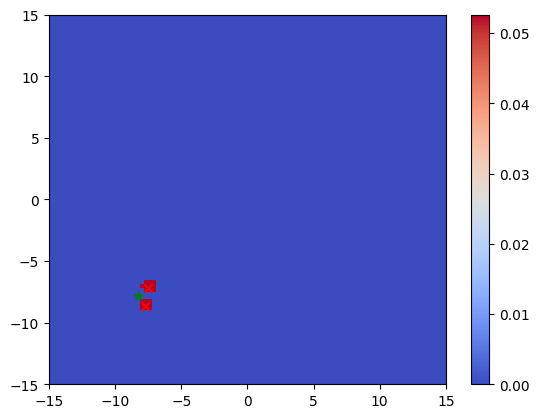

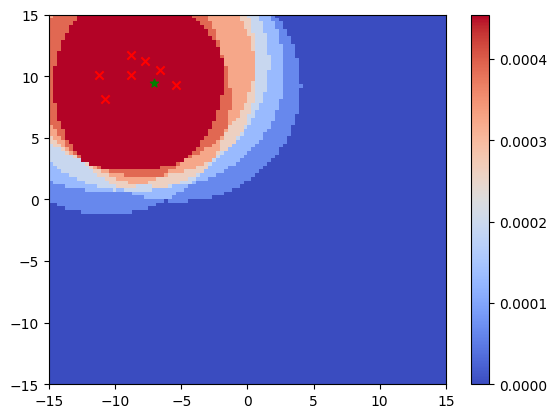

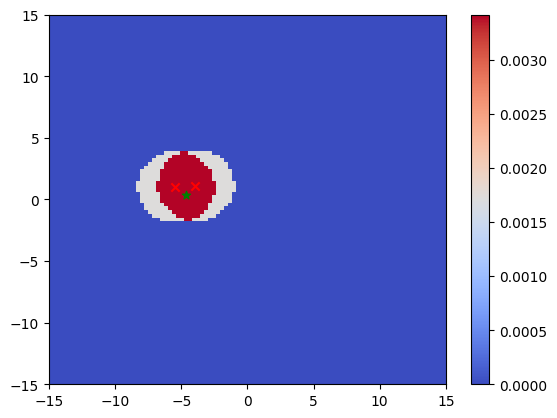

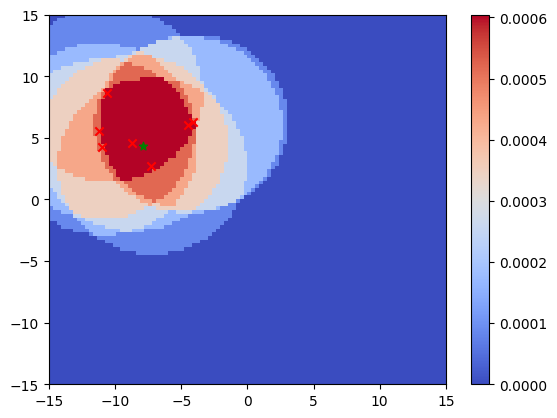

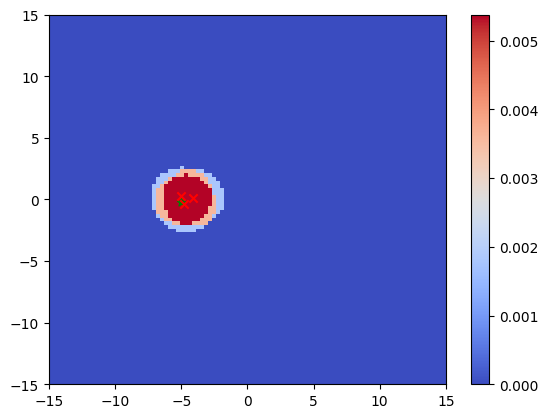

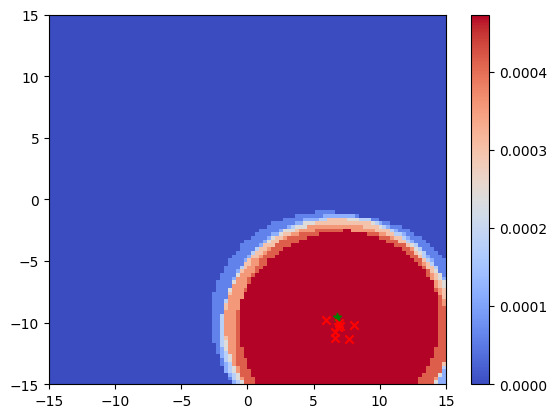

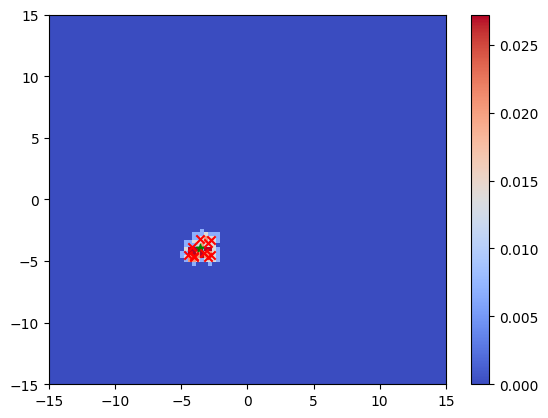

In [5]:
def generateSpreeVariedR(N):
    blobHouse = [r.uniform(-10, 10) for c in range(2)]
    locations = [blobHouse]
    R = int(r.uniform(1, 5)) 
    for i in range(N):
        blobLocation = [c for c in blobHouse]
        for j in range(R ** 2):
            blobLocation = [c + r.uniform(-1, 1) for c in blobLocation]
        locations.append(blobLocation)
    return(locations)

def searchForStarVariedR(spree, ranges = ranges, resolution = 100):
    heatmap = [[0 for c in range(resolution)] for c in range(resolution)]
    xs = np.linspace(ranges[0][0], ranges[0][1], resolution)
    ys = np.linspace(ranges[1][0], ranges[1][1], resolution)
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            for location in spree[1:]:
                if (location[0] - x) ** 2 + (location[1] - y) ** 2 < np.std(spree[1:]) ** 2:
                    heatmap[yi][xi] += 1  
    total = sum(sum(row) for row in heatmap)
    output = [[c / total for c in row] for row in heatmap]
    return(output)

for i in range(10):
    spree = generateSpreeVariedR(r.randint(2, 10))
    heatmap = searchForStarVariedR(spree)
    plt.imshow(
        heatmap,
        extent = [ranges[0][0], ranges[0][1], ranges[1][0], ranges[1][1]],
        origin = "lower",
        aspect = "auto",
        cmap = "coolwarm"
    )
    plt.colorbar()
    plotSpreeNoShow(spree)
    plt.show()

What happens if our criminal has an unusually large R? (maybe they travel a lot)

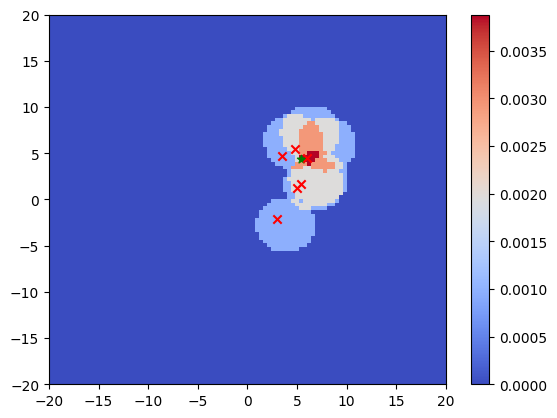

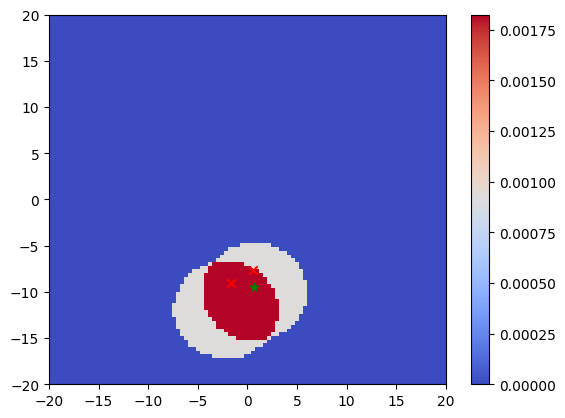

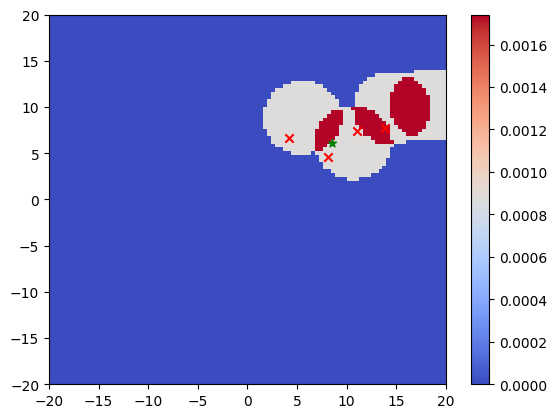

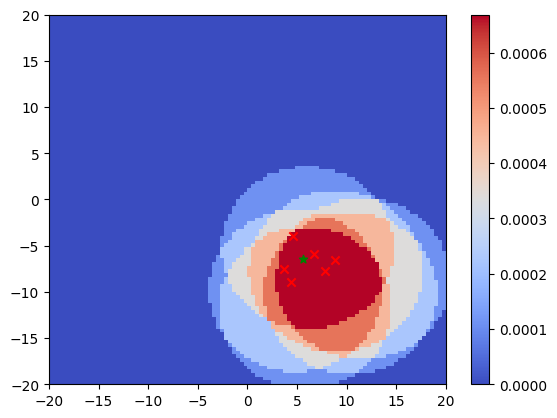

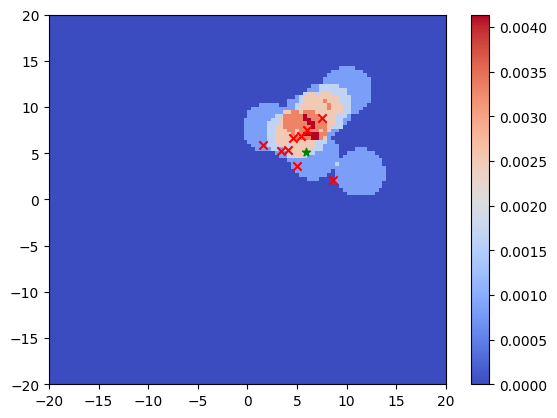

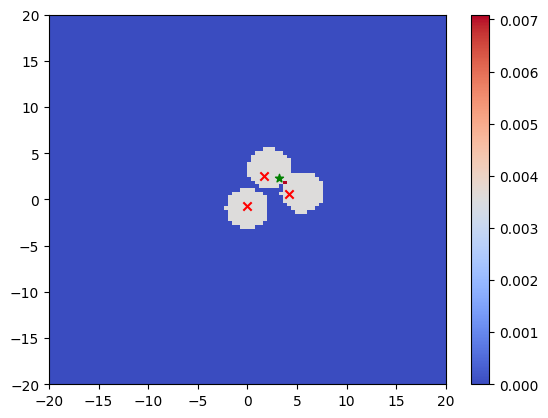

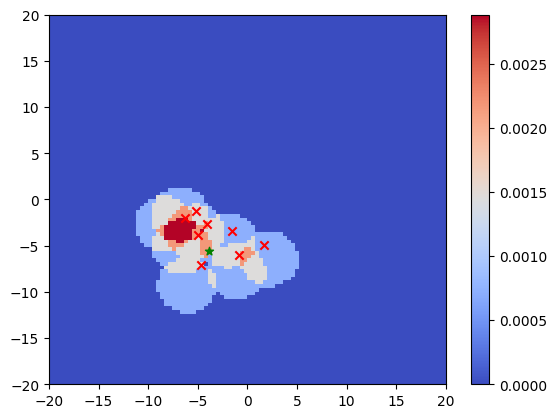

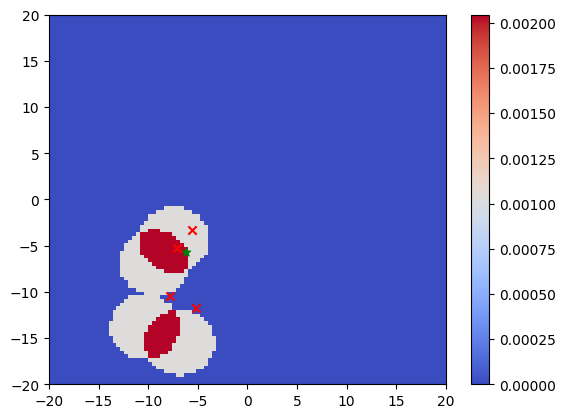

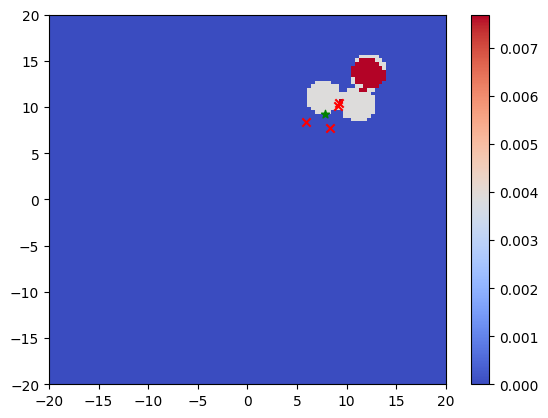

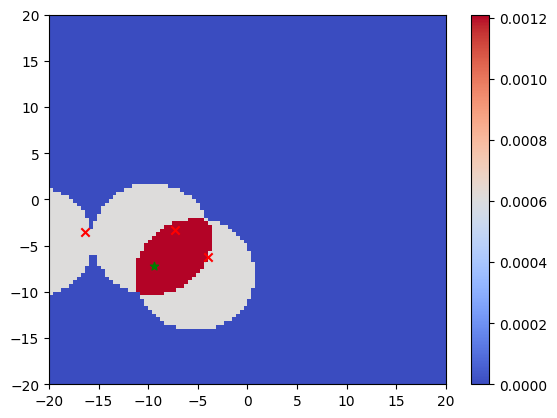

In [6]:
ranges = [[-20, 20], [-20, 20]]
def generateSpreeLargeR(N):
    blobHouse = [r.uniform(-10, 10) for c in range(2)]
    locations = [blobHouse]
    R = int(r.uniform(4, 8)) 
    for i in range(N):
        blobLocation = [c for c in blobHouse]
        for j in range(R ** 2):
            blobLocation = [c + r.uniform(-1, 1) for c in blobLocation]
        locations.append(blobLocation)
    return(locations)

def searchForStarLargeR(spree, ranges = ranges, resolution = 100):
    heatmap = [[0 for c in range(resolution)] for c in range(resolution)]
    xs = np.linspace(ranges[0][0], ranges[0][1], resolution)
    ys = np.linspace(ranges[1][0], ranges[1][1], resolution)
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            for location in spree[1:]:
                if (location[0] - x) ** 2 + (location[1] - y) ** 2 < np.std(spree[1:]) ** 2:
                    heatmap[yi][xi] += 1  
    total = sum(sum(row) for row in heatmap)
    output = [[c / total for c in row] for row in heatmap]
    return(output)

for i in range(10):
    spree = generateSpreeLargeR(r.randint(2, 10))
    heatmap = searchForStarVariedR(spree)
    plt.imshow(
        heatmap,
        extent = [ranges[0][0], ranges[0][1], ranges[1][0], ranges[1][1]],
        origin = "lower",
        aspect = "auto",
        cmap = "coolwarm"
    )
    plt.colorbar()
    plotSpreeNoShow(spree)
    plt.show()